In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px


In [3]:
path_dir = "C:\\Users\\Modern\\Мой диск\\Диссертация\\Data\\Magnetic field data\\Membrane levitating system 2 take"
# file_path = "C:\\Users\\Modern\\Мой диск\\Диссертация\\Data\\Magnetic field data\\Membrane levitating system 2 take\\1mm.dat"


fields_df = pd.DataFrame({'B':[], 'X':[], 'Y':[], 'Z':[]})

for address, dirs, files in os.walk(path_dir):
    for file in files:
        if ".dat" in str(file):
            z = re.search(r'([0-9]+)',file)
            z_coord = z[0]
            file_path = os.path.join(address,file)

            field_i = pd.read_csv(file_path,encoding = 'unicode_escape',delimiter='\t',names= ['B','X','Y'],skiprows=[0])
            field_i['Z'] = int(z_coord)
            # print(z_coord)

            fields_df = pd.concat([fields_df,field_i])
            # print(field_i['B'])



# print(fields_df)
# fields_df['B'].plot()
# plt.show()



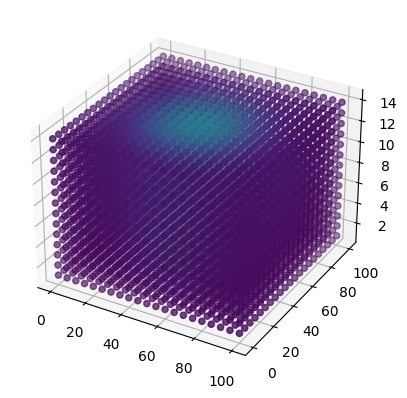

In [4]:

fields_np = fields_df.to_numpy()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(xs = fields_np[:,1],ys =fields_np[:,2],zs = fields_np[:,3], c=fields_np[:,0])

In [18]:
fields_res = fields_df[fields_df['B']>50]
fields_flat = fields_df[fields_df['Y']==50]
fields_flat_np = fields_flat.to_numpy()


fields_flat_square = np.reshape(fields_flat_np[:,0],(21,14))

[[-2.51200e+01  4.71000e+00  6.28800e+01  1.66430e+02  3.30670e+02
   5.64560e+02  8.31350e+02  1.09393e+03  1.30039e+03  1.47012e+03
   1.56158e+03  1.55653e+03  1.45098e+03  1.28056e+03]
 [ 1.05763e+03  7.86030e+02  5.29760e+02  3.10200e+02  1.59570e+02
   6.26400e+01  7.81000e+00 -9.41000e+00  2.97800e+01  1.02670e+02
   2.21760e+02  3.94710e+02  6.20660e+02  8.63350e+02]
 [ 1.09464e+03  1.28081e+03  1.42695e+03  1.49183e+03  1.46273e+03
   1.34369e+03  1.16399e+03  9.31070e+02  6.69120e+02  4.41100e+02
   2.56120e+02  1.34090e+02  5.39400e+01  7.40000e+00]
 [ 1.42900e+01  6.26200e+01  1.46200e+02  2.84150e+02  4.65200e+02
   6.87970e+02  9.02390e+02  1.09431e+03  1.23187e+03  1.32960e+03
   1.35790e+03  1.31383e+03  1.19786e+03  1.03372e+03]
 [ 8.13730e+02  5.71890e+02  3.68110e+02  2.10530e+02  1.08500e+02
   4.32200e+01  5.81000e+00  9.48000e+00  5.57800e+01  1.32020e+02
   2.61630e+02  4.45330e+02  6.65010e+02  8.99110e+02]
 [ 1.09426e+03  1.24466e+03  1.33183e+03  1.34639e+03  

In [6]:


fig = px.scatter_3d(fields_res, x='X', y='Y', z='Z', color='B', opacity=0.8, color_continuous_scale='Spectral_r')

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4,
    )
)


fig.update_traces(marker={'size': 2})

fig.show()

In [7]:
fig = px.scatter(fields_flat, x='X', y='Z', color='B', opacity=1, color_continuous_scale='Spectral_r')
fig.update_traces(marker={'size': 10})
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4,
    )
)
fig.show()

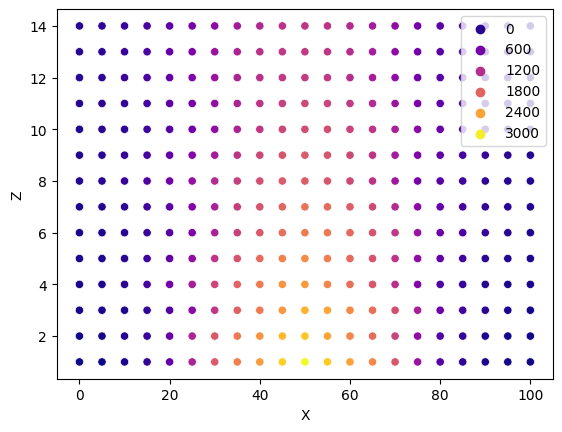

In [71]:
sns.scatterplot(data=fields_flat, x="X", y="Z",hue='B',palette="plasma")
plt.legend(loc='upper right')

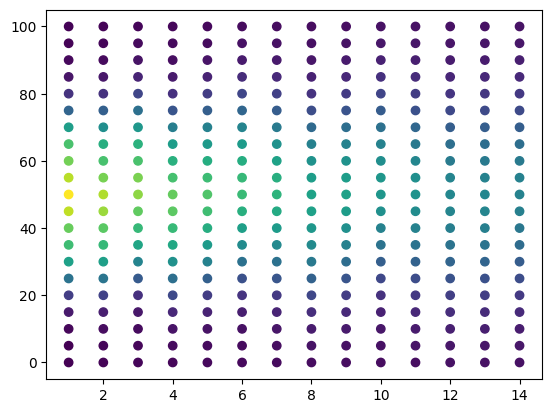

In [114]:
fig, ax = plt.subplots()
x = fields_flat_np[:,3]
y = fields_flat_np[:,1]
z = fields_flat_np[:,0]
# ax.pcolormesh([x,y,z])
ax.scatter(x,y,c=z)


In [125]:
fig = px.imshow(fields_np)
fig.show()